## 1. 라이브러리 호출 및 데이터 불러오기

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV

In [16]:
df10=pd.read_excel('제주도_클러스터링_데이터_최종.xlsx')
df10

,정류소아이디,버스개수,배차간격,이용자수,거주인구,근무인구,방문인구,학교수,교사수,학생수,주당수업시수,종속변수,종속변수2,cluster_버스,cluster_인구,cluster_학교
0,1,3.044944,36.882022,46.207865,7847,516,5553,2,97,1083,688,15.175277,2577.059041,1,1,3
1,6,4.561265,47.786561,69.972332,86539,7778,25407,10,641,9283,620,15.340555,18972.588388,1,3,0
2,7,3.385185,44.962963,99.696296,86539,7778,25407,10,641,9283,620,29.450766,25564.037199,1,3,0
3,8,1.000000,47.500000,129.500000,86539,7778,25407,10,641,9283,620,129.500000,86539.000000,2,3,0
4,9,6.505774,48.845266,65.667436,86539,7778,25407,10,641,9283,620,10.093717,13301.876819,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
614,4290,1.000000,77.500000,42.222222,63976,7751,19333,10,630,9754,999,42.222222,63976.000000,0,0,0
615,4298,1.111111,50.000000,68.333333,38967,2420,22731,17,450,4273,330,61.500000,35070.300000,1,2,2
616,4306,2.000000,37.500000,16.000000,4847,2284,4210,2,90,209,267,8.000000,2423.500000,1,1,3
617,4371,1.831461,30.000000,17.292135,38967,2420,22731,17,450,4273,330,9.441718,21276.460123,1,2,2


## 2. 필요없는 독립변수 제거

In [17]:
df5 = df10.drop(columns=['버스개수', '이용자수', '종속변수', '교사수'])

# 버스 공급이 많고, 수요가 적은 클러스터 행 제거
df = df5[~((df5['cluster_버스'] == 0) & (df5['cluster_인구'] == 1) & (df5['cluster_학교'] == 1))]
df

,정류소아이디,배차간격,거주인구,근무인구,방문인구,학교수,학생수,주당수업시수,종속변수2,cluster_버스,cluster_인구,cluster_학교
0,1,36.882022,7847,516,5553,2,1083,688,2577.059041,1,1,3
1,6,47.786561,86539,7778,25407,10,9283,620,18972.588388,1,3,0
2,7,44.962963,86539,7778,25407,10,9283,620,25564.037199,1,3,0
3,8,47.500000,86539,7778,25407,10,9283,620,86539.000000,2,3,0
4,9,48.845266,86539,7778,25407,10,9283,620,13301.876819,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
614,4290,77.500000,63976,7751,19333,10,9754,999,63976.000000,0,0,0
615,4298,50.000000,38967,2420,22731,17,4273,330,35070.300000,1,2,2
616,4306,37.500000,4847,2284,4210,2,209,267,2423.500000,1,1,3
617,4371,30.000000,38967,2420,22731,17,4273,330,21276.460123,1,2,2


## 3. 스케일링

In [18]:
feature_columns = ['배차간격', '거주인구', '근무인구', '방문인구', '학교수', '학생수', '주당수업시수','cluster_버스','cluster_인구','cluster_학교']
X = df[feature_columns]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

scaled_df = pd.DataFrame(data=X_scaled, columns=feature_columns)

y = pd.DataFrame(df['종속변수2'], columns=['종속변수2'])

merged_df = pd.concat([scaled_df, y], axis=1)

In [69]:
merged_df.to_excel('제주 버스 스케일링 데이터.xlsx',index=False)

## 4. 최적 모델링 뽑기

In [19]:
df1 = pd.read_excel('제주 버스 스케일링 데이터.xlsx') #merged_df와 동일
df1

,배차간격,거주인구,근무인구,방문인구,학교수,학생수,주당수업시수,cluster_버스,cluster_인구,cluster_학교,종속변수2
0,-0.935271,-1.295252,-1.132560,-1.407147,-1.211931,-1.118778,0.064807,0.107046,-0.384904,1.415150,2577.059041
1,-0.220765,1.558967,1.298153,1.129728,0.358594,1.198471,-0.157876,0.107046,1.688494,-1.155531,18972.588388
2,-0.405777,1.558967,1.298153,1.129728,0.358594,1.198471,-0.157876,0.107046,1.688494,-1.155531,25564.037199
3,-0.239541,1.558967,1.298153,1.129728,0.358594,1.198471,-0.157876,1.282496,1.688494,-1.155531,86539.000000
4,-0.151395,1.558967,1.298153,1.129728,0.358594,1.198471,-0.157876,0.107046,1.688494,-1.155531,13301.876819
...,...,...,...,...,...,...,...,...,...,...,...
566,1.726170,0.740590,1.289116,0.353613,0.358594,1.331572,1.083256,-1.068403,-1.421603,-1.155531,63976.000000
567,-0.075732,-0.166505,-0.495260,0.787798,1.732804,-0.217311,-1.107556,0.107046,0.651795,0.558257,35070.300000
568,-0.894778,-1.404064,-0.540781,-1.578750,-1.211931,-1.365763,-1.313865,0.107046,-0.384904,1.415150,2423.500000
569,-1.386206,-0.166505,-0.495260,0.787798,1.732804,-0.217311,-1.107556,0.107046,0.651795,0.558257,21276.460123


In [20]:
X = df1.drop(['종속변수2'], axis=1)
y = df1['종속변수2']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'ElasticNet Regression': ElasticNet(),
    'Decision Tree Regression': DecisionTreeRegressor(),
    'Random Forest Regression': RandomForestRegressor(),
    'Gradient Boosting Regression': GradientBoostingRegressor(),
    'Support Vector Regression': SVR(),
    'XGBoost Regression': XGBRegressor()
}

param_grids = {
    'Linear Regression': {},
    'Ridge Regression': {'alpha': [0.1, 1.0, 10.0]},
    'Lasso Regression': {'alpha': [0.1, 1.0, 10.0]},
    'ElasticNet Regression': {'alpha': [0.1, 1.0, 10.0], 'l1_ratio': [0.1, 0.5, 0.9]},
    'Decision Tree Regression': {'max_depth': [None, 10, 20]},
    'Random Forest Regression': {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]},
    'Gradient Boosting Regression': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.5]},
    'Support Vector Regression': {'C': [0.1, 1.0, 10.0], 'epsilon': [0.01, 0.1, 1.0]},
    'XGBoost Regression': {'learning_rate': [0.01, 0.1, 0.5], 'max_depth': [3, 5, 7]}
}

best_models = {}

for model_name, model in models.items():
    print(f"{model_name}")
    
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], 
                               scoring='neg_mean_squared_error', cv=5, verbose=1)
            
    grid_search.fit(X_train, y_train)
    
    best_model = grid_search.best_estimator_
    best_models[model_name] = best_model
    print(f"Best Parameters: {grid_search.best_params_}")
    
    y_pred = best_model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    print(f"{model_name}:")
    print(f"MSE: {mse}")
    print(f"MAE: {mae}")
    print(f"RMSE: {rmse}")
    print(f"R-squared: {r2}")
    print("-------------------------")

Linear Regression
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best Parameters: {}
Linear Regression:
MSE: 271194411.44287515
MAE: 12568.951866501598
RMSE: 16467.981401582743
R-squared: 0.48737393096408255
-------------------------
Ridge Regression
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best Parameters: {'alpha': 10.0}
Ridge Regression:
MSE: 269161458.23500437
MAE: 12505.653887731405
RMSE: 16406.140869656225
R-squared: 0.4912167270082195
-------------------------
Lasso Regression
Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best Parameters: {'alpha': 10.0}
Lasso Regression:
MSE: 270811476.37293786
MAE: 12549.236300923814
RMSE: 16456.350639584034
R-squared: 0.48809777515597985
-------------------------
ElasticNet Regression
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Parameters: {'alpha': 0.1, 'l1_ratio': 0.5}
ElasticNet Regression:
MSE: 268491946.6087219
MAE: 12499.491263321483
RMSE: 16385.723865875498
R-squared: 0.

## 5. GradientBoost 성능, 변수중요도 뽑기

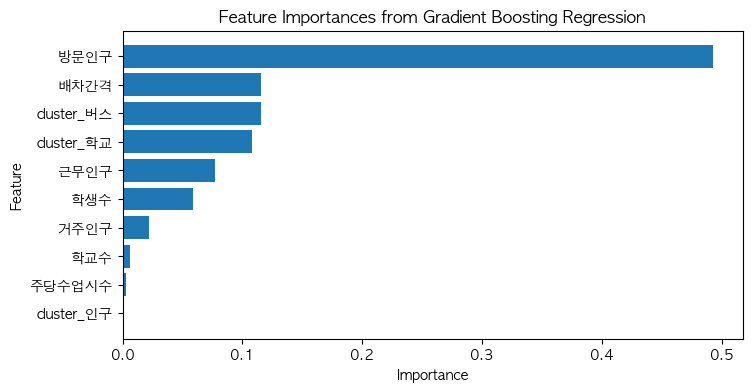

<Figure size 640x480 with 0 Axes>

In [25]:
best_gb_model = best_models['Gradient Boosting Regression']
feature_importances = best_gb_model.feature_importances_

feature_names = X.columns

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.rcParams['font.family'] = 'AppleGothic'

plt.figure(figsize=(8, 4))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Gradient Boosting Regression')
plt.gca().invert_yaxis()
plt.show()

importance_df.to_excel('변수중요도.xlsx', index = False)

## 6. 예측값 vs 실제값, 성능 출력

In [141]:
y_pred_train_gb = best_gb_model.predict(X_train)
y_pred_test_gb = best_gb_model.predict(X_test)

train_df = pd.DataFrame({'Actual': y_train, 'Predicted': y_pred_train_gb})
test_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test_gb})

comparison_df = pd.concat([train_df, test_df])

comparison_df

,Actual,Predicted
182,18110.068966,12866.007758
63,61.806227,756.774849
158,819.470527,3692.812869
60,4892.722133,5605.200617
15,4664.558011,27581.168932
...,...,...
75,14232.703003,48035.833911
250,32597.650224,52492.853999
528,10073.272727,7713.011678
268,40984.625000,48206.027917


In [142]:
performance_df = pd.DataFrame({
    'Metric': ['MSE', 'MAE', 'RMSE', 'R-squared'],
    'Value': [mse, mae, rmse, r2]
})

performance_df

performance_df.to_excel('모델 성능.xlsx', index =False)

## 7. 정류소 아이디, 예측, 실제 데이터프레임 출력

In [129]:
df4 = df[['정류소아이디']]

df5 = pd.concat([df4, comparison_df])

df5

df5.to_excel('정류소아이디-실제-예측.xlsx', index=False)

In [143]:
df6 = pd.read_excel('정류소아이디-실제-예측.xlsx')
df6

,정류소아이디,Actual,Predicted
0,1,18110.068966,12866.007758
1,6,61.806227,756.774849
2,7,819.470527,3692.812869
3,8,4892.722133,5605.200617
4,9,4664.558011,27581.168932
...,...,...,...
566,4290,14232.703003,48035.833911
567,4298,32597.650224,52492.853999
568,4306,10073.272727,7713.011678
569,4371,40984.625000,48206.027917


## 8. 종속변수 상위 10퍼 정류장 뽑기

In [144]:
top_5_percent_threshold = df6['Predicted'].quantile(0.90)

top_5_percent_df = df6[df6['Predicted'] >= top_5_percent_threshold]

top_5_percent_df

,정류소아이디,Actual,Predicted
10,25,86539.000000,74417.506164
33,62,52033.813333,54329.815634
37,68,64206.354839,52492.853999
40,72,63976.000000,59968.447970
78,131,56438.478261,57592.995175
...,...,...,...
544,4029,63976.000000,59968.447970
545,4031,63976.000000,54329.815634
553,4041,12997.952569,52492.853999
564,4285,86539.000000,74417.506164


In [146]:
top_5_percent_df.to_excel('상위 10퍼 정류장.xlsx', index = False)